In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
train_dir = '/content/drive/MyDrive/MFCC/BB'
test_dir = '/content/drive/MyDrive/MFCC/BIT'

train_dataset = train.flow_from_directory(train_dir,
                      target_size=(150,150),
                      batch_size = 32,
                      class_mode = 'binary')

test_dataset = test.flow_from_directory(test_dir,
                     target_size=(150,150),
                     batch_size = 32,
                     class_mode = 'binary')
test_dataset.class_indices

Found 523 images belonging to 2 classes.
Found 823 images belonging to 2 classes.


{'Disorder': 0, 'NonDisorder': 1}

In [ ]:
train_dir = '/content/drive/MyDrive/MFCC/BB'
train = ImageDataGenerator(validation_split=0.2,rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='binary',
    batch_size = 32,
    subset='training'
)
test_dataset = train.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='binary',
    batch_size = 32,
    subset='validation'
)
test_dataset.class_indices


Found 420 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


{'Disorder': 0, 'NonDisorder': 1}

In [ ]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
!pip install wandb
import wandb

wandb.login()

wandb: Currently logged in as: juanfengyun. Use `wandb login --relogin` to force relogin


True

In [ ]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 13,
         epochs = 80,
         validation_data = test_dataset

         )

In [ ]:
#steps_per_epoch = train_imagesize/batch_size

history = model.fit_generator(train_dataset,
         steps_per_epoch = 13,
         epochs = 100,
         validation_data = test_dataset

         )



<ipython-input-9-036a352ebd94>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset,


Epoch 1/100
13/13 [==============================] - 94s 7s/step - loss: 0.7716 - accuracy: 0.5258 - precision: 0.5580 - recall: 0.5952 - val_loss: 0.7095 - val_accuracy: 0.5243 - val_precision: 0.5243 - val_recall: 1.0000
Epoch 2/100
13/13 [==============================] - 4s 330ms/step - loss: 0.6937 - accuracy: 0.5026 - precision: 0.5192 - recall: 0.6650 - val_loss: 0.6922 - val_accuracy: 0.5243 - val_precision: 0.5243 - val_recall: 1.0000
Epoch 3/100
13/13 [==============================] - 4s 336ms/step - loss: 0.6933 - accuracy: 0.5284 - precision: 0.5284 - recall: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.5243 - val_precision: 0.5243 - val_recall: 1.0000
Epoch 4/100
13/13 [==============================] - 4s 329ms/step - loss: 0.6957 - accuracy: 0.5129 - precision: 0.5129 - recall: 1.0000 - val_loss: 0.6923 - val_accuracy: 0.5243 - val_precision: 0.5243 - val_recall: 1.0000
Epoch 5/100
13/13 [==============================] - 4s 335ms/step - loss: 0.6944 - accuracy: 0.4871 -

In [ ]:
wandb.finish()

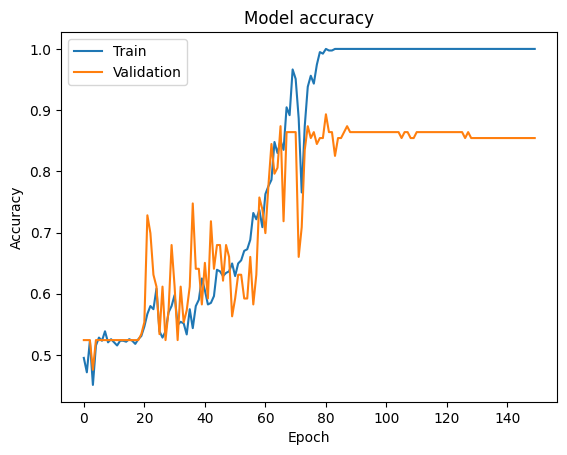

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

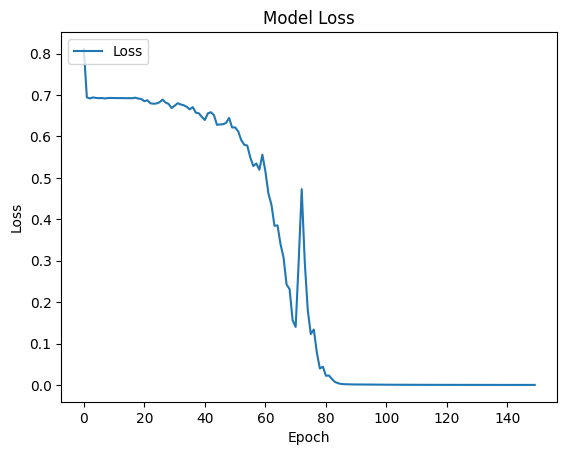

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper left')
plt.show()

In [ ]:

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))

    plt.imshow(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:

        plt.xlabel("nondisorder",fontsize=30)


    elif val == 0:

        plt.xlabel("disorder",fontsize=30)
    plt.show()

1/1 [==============================] - 0s 18ms/step
[[0.]]


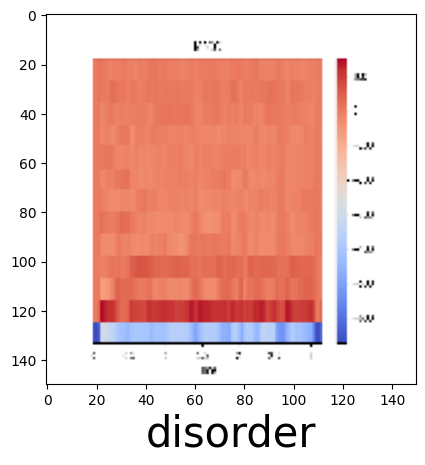

In [ ]:
predictImage('/content/drive/MyDrive/MFCC/BB/Disorder/2AU201-01DM4_9SSD-BB02.png')